In [ ]:
Explore the dataset.

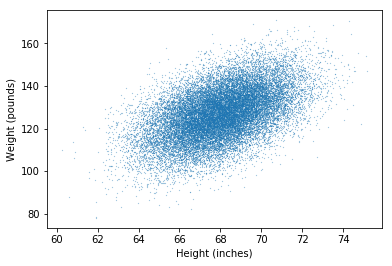

In [201]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

data = genfromtxt('dataset.csv', delimiter=',')
data = np.delete(data,(0),axis=0)

plt.scatter(data[:,1],data[:,2],s=0.025)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()


We see there is a somewhat positive correlation between height and weight - as would be expected. We can use gradient descent to build a model of the form y = theta0 + theta1*X where we are to find the values of theta0 and theta1 which minimise this cost function for all samples.

In [138]:
def cost_function(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m))*np.sum(np.square(predictions-y))
    return cost

The learning algorithms implemented below are called gradient descent and stochastic gradient descent. Running both of them we find that gradient descent is unstable to training and the values of theta provided by the model diverge. Stochastic gradient descent takes a single training example at a time and performs updates to the theta values at every step - this helps the training stabilise and ultimately converge.

In [162]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=1):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta - (1/m)*learning_rate*(X.T.dot((prediction-y)))
        theta_history[it,:] = theta.T
        cost_history[it] = cost_function(theta,X,y)
    return theta, cost_history, theta_history

In [176]:
def stochastic_gradient_descent(X,y,theta,learning_rate,iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_function(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

Perform gradient descent.

In [195]:
X = data[:,1]
y = data[:,2]
x_train = np.reshape(x[0:20000],(20000,1))
x_test = np.reshape(x[20000:],(5000,1))
y_train = np.reshape(y[0:20000],(20000,1))
y_test = np.reshape(y[20000:],(5000,1))

learning_rate = 0.1
iterations = 1000

theta = np.random.randn(2,1)
X_bias = np.c_[np.ones((len(x_train),1)),x_train]
prediction = np.dot(X_bias,theta)

theta,cost_history = stochastic_gradient_descent(X_bias,y,theta,learning_rate,iterations)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Theta0:          -7.731,
Theta1:          1.993
Final cost/MSE:  1280447.191


We may plot how the cost function varies with iteration.

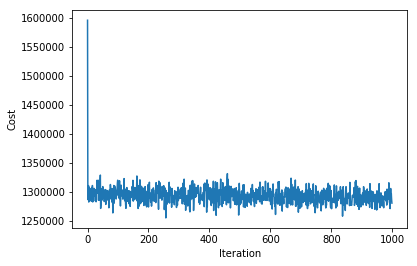

In [223]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

After 10000 iterations we can plot the line of best fit to show that gradient descent produced a good model for us.

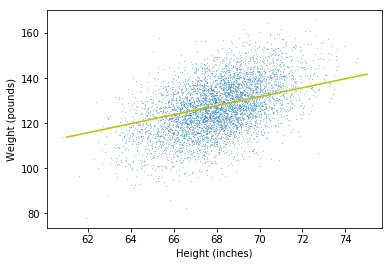

In [219]:
final_theta0 = theta[0][0]
final_theta1 = theta[1][0]

x = np.linspace(61, 75, 100)
plt.scatter(x_test,y_test,s=0.025)
plt.plot(x,final_theta0+final_theta1*x,'y')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()

We could alternatively use a linear regression model imported from scikit learn.

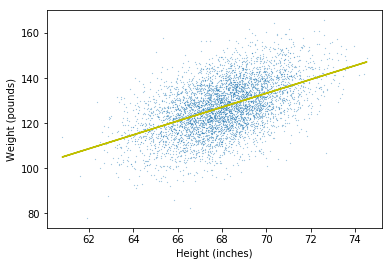

In [216]:
from sklearn import datasets, linear_model

x = data[:,1]
y = data[:,2]
x_train = np.reshape(x[0:20000],(20000,1))
x_test = np.reshape(x[20000:],(5000,1))
y_train = np.reshape(y[0:20000],(20000,1))
y_test = np.reshape(y[20000:],(5000,1))

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

plt.scatter(x_test, y_test,s=0.025)
plt.plot(x_test, y_pred, color='y')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()
